In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [7]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
Using legacy setup.py install for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'
You should consider upgrading via the 'c:\program files (x86)\python38-32\python.exe -m pip install --upgrade pip' command.


In [17]:
path = "Brent_crude_oil.csv"
brent_df=pd.read_csv(path)

In [18]:
brent_df.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/01/2010,80.120003,79.82,80.120003,80.120003,80.120003,97.0


In [19]:
brent_df.dropna(inplace = True)

In [20]:
brent_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [21]:
df1=brent_df.copy()

In [22]:
df1["Date"]=pd.to_datetime(brent_df["Date"],format='%d/%m/%Y')
df1.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,80.120003,79.82,80.120003,80.120003,80.120003,97.0


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2485 entries, 0 to 3066
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2485 non-null   datetime64[ns]
 1   Open       2485 non-null   float64       
 2   High       2485 non-null   float64       
 3   Low        2485 non-null   float64       
 4   Close      2485 non-null   float64       
 5   Adj Close  2485 non-null   float64       
 6   Volume     2485 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 155.3 KB


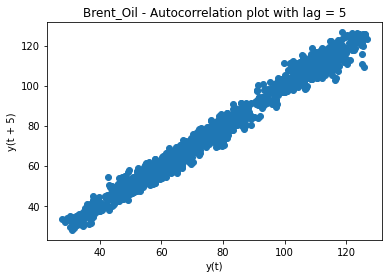

In [31]:
plt.figure()
lag_plot(df1['Close'], lag=5)
plt.title('Brent_Oil - Autocorrelation plot with lag = 5')
plt.show()

We can now confirm that ARIMA is going to be a good model to be applied to this type of data (there is auto-correlation in the data).
Finally, let’s plot the stock price evolution over time.

In [25]:
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,80.120003,79.820000,80.120003,80.120003,80.120003,97.0
1,2010-01-05,80.589996,80.260002,80.589996,80.589996,80.589996,97.0
2,2010-01-06,81.129997,81.699997,80.129997,81.889999,81.889999,7.0
3,2010-01-07,81.510002,81.510002,81.629997,81.510002,81.510002,7.0
4,2010-01-08,81.370003,81.529999,81.089996,81.370003,81.370003,7.0
...,...,...,...,...,...,...,...
3061,2020-01-30,59.610001,59.610001,57.730000,58.290001,58.290001,17435.0
3062,2020-01-31,59.070000,59.529999,57.980000,58.160000,58.160000,578.0
3064,2020-02-03,58.200001,58.200001,58.200001,58.200001,58.200001,66338.0
3065,2020-02-04,54.150002,55.639999,53.689999,53.959999,53.959999,52393.0


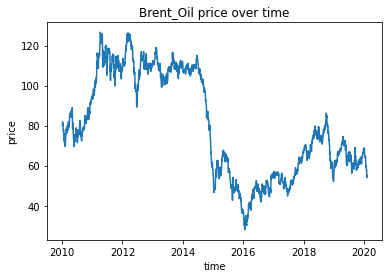

In [26]:
plt.plot(df1["Date"], df1["Close"])
# plt.xticks(np.arange(0,2485,100), df1['Date'][0:2485:100])
plt.title("Brent_Oil price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

Next, let’s divide the data into a training (80 % ) and test (20%) set. For this tutorial we select the following ARIMA parameters: p=4, d=1 and q=0.

In [111]:
train_data, test_data = df1[0:int(len(df1)*0.8)], df1[int(len(df1)*0.8):]

In [112]:
training_data = train_data['Close'].values
test_data = test_data['Close'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0][0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
    
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 1.6357299062361605


In [41]:
df1.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,80.120003,79.820000,80.120003,80.120003,80.120003,97.0
1,2010-01-05,80.589996,80.260002,80.589996,80.589996,80.589996,97.0
2,2010-01-06,81.129997,81.699997,80.129997,81.889999,81.889999,7.0
3,2010-01-07,81.510002,81.510002,81.629997,81.510002,81.510002,7.0
4,2010-01-08,81.370003,81.529999,81.089996,81.370003,81.370003,7.0
6,2010-01-11,80.970001,81.709999,81.010002,80.970001,80.970001,7.0
7,2010-01-12,79.300003,79.300003,79.029999,79.300003,79.300003,7.0
8,2010-01-13,78.529999,79.019997,77.250000,78.309998,78.309998,18.0
9,2010-01-14,77.820000,78.470001,78.010002,77.820000,77.820000,6.0
10,2010-01-15,77.550003,77.820000,76.879997,77.110001,77.110001,4.0


In [61]:
df1.loc[df1["Close"] == 67.620003].index

Int64Index([2434, 2459], dtype='int64')

In [102]:
df1[].shape,len(model_predictions)

((2485, 7), 497)

In [114]:
df_test=df1.tail(497)
df_test['Prediction']=model_predictions
df_test

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
2459,2018-02-05,68.199997,68.459999,67.000000,67.620003,67.620003,32399.0,68.575802
2460,2018-02-06,66.989998,67.589996,66.550003,66.860001,66.860001,32169.0,67.661133
2461,2018-02-07,67.230003,67.720001,65.160004,65.510002,65.510002,56412.0,66.906992
2462,2018-02-08,65.440002,65.589996,64.110001,64.809998,64.809998,37936.0,65.550934
2463,2018-02-09,64.379997,64.629997,61.770000,62.790001,62.790001,34853.0,64.832978
...,...,...,...,...,...,...,...,...
3061,2020-01-30,59.610001,59.610001,57.730000,58.290001,58.290001,17435.0,59.737073
3062,2020-01-31,59.070000,59.529999,57.980000,58.160000,58.160000,578.0,58.290388
3064,2020-02-03,58.200001,58.200001,58.200001,58.200001,58.200001,66338.0,58.212609
3065,2020-02-04,54.150002,55.639999,53.689999,53.959999,53.959999,52393.0,58.196170


In [115]:
df_test.to_csv('brent_ARIMA.csv',index=False)

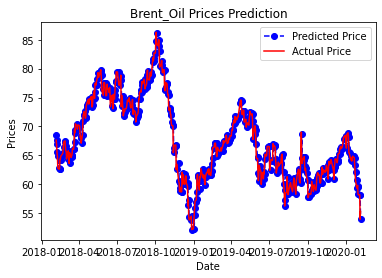

In [29]:
test_set_range = df1[int(len(df1)*0.8):].Date
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('Brent_Oil Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
# plt.xticks(np.arange(881,1259,50), df1.Date[881:1259:50])
plt.legend()
plt.show()

In [33]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeableWARNING: You are using pip version 20.1.1; however, version 21.0.1 is available.
  Using cached plotly-4.14.3-py2.py3-none-any.whl (13.2 MB)
  Using cached retrying-1.3.3.tar.gz (10 kB)
Using legacy setup.py install for retrying, since package 'wheel' is not installed.
    Running setup.py install for retrying: started
    Running setup.py install for retrying: finished with status 'done'

You should consider upgrading via the 'c:\program files (x86)\python38-32\python.exe -m pip install --upgrade pip' command.


In [32]:
targets = test_data
preds = model_predictions

In [86]:
date_df=pd.DataFrame(df1[int(len(df1)*0.8):].Date)
date_df

,Date
2459,2018-02-05
2460,2018-02-06
2461,2018-02-07
2462,2018-02-08
2463,2018-02-09
...,...
3061,2020-01-30
3062,2020-01-31
3064,2020-02-03
3065,2020-02-04


In [93]:
df_test = pd.DataFrame(data=test_data)
# df_test

In [88]:
df_preds = pd.DataFrame(data=preds)
# df_preds

In [96]:
# t = df_test.to_frame("Close")
# p = df_preds.to_frame("Close")


# p = p.shift(periods=-1)

# p = p.iloc[:-1]
# t = t.iloc[:-1]
frames=[date_df['Date'],df_test[0],df_preds[0]]
headers=['Date','test','preds']

graphdata= pd.concat(frames,axis=1,keys=headers,)
graphdata = graphdata.shift(periods=-5)
# graphdata = df_test.merge(df_preds, how='inner', suffixes=('_actual', '_prediction'))

In [97]:
graphdata.head(10)

,Date,test,preds
0,NaT,62.590000,62.836886
1,NaT,62.720001,62.601110
2,NaT,64.360001,62.684494
3,NaT,64.330002,64.232620
4,NaT,64.839996,64.268504
5,NaT,65.250000,64.824653
6,NaT,65.419998,65.266288
7,NaT,66.389999,65.395419
8,NaT,67.309998,66.364958
9,NaT,67.500000,67.260363


In [68]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure([

    go.Scatter(
        name='Actual',
        x=graphdata.index,
        y=graphdata['Close_actual'],
        mode='lines',
        marker=dict(color="#008080"),
        line=dict(width=1),
        showlegend=True
    ),
    go.Scatter(
        name='Prediction',
        x=graphdata.index,
        y=graphdata['Close_prediction'],
        marker=dict(color="#FF8C00"),
        line=dict(width=1),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        showlegend=True
    )
])

fig.update_layout(
    yaxis_title='',
    title='',
    hovermode="x"
)

fig.show()

KeyError: 'Close_actual'